Pour agréger les données issues de multiples instances (ou runs) et les analyser, nous pouvons calculer des statistiques descriptives de base sur l'ensemble des instances, puis visualiser ces statistiques pour obtenir une vue d'ensemble de la performance ou des caractéristiques des runs. Nous pourrions choisir de calculer la moyenne, la médiane, et l'écart-type pour chaque colonne de données à travers toutes les instances.

## Visualisation avec un Graphique de Moyennes et d’Écart-Type
Nous allons calculer la moyenne et l'écart-type pour chaque colonne de données à travers toutes les instances, puis les tracer. Cela peut donner une bonne idée de la variabilité et de la tendance centrale des mesures à travers les runs.

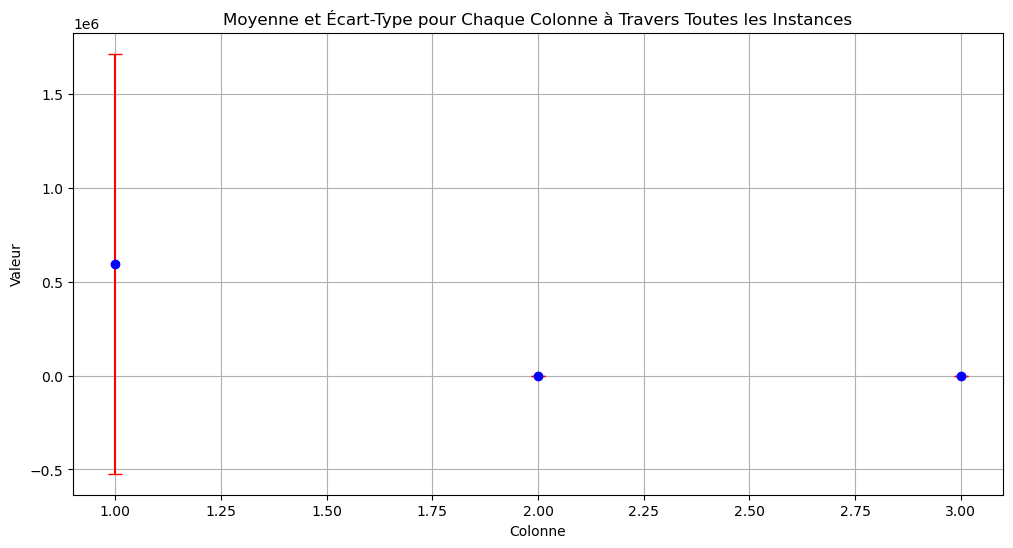

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def read_and_aggregate_data(file_path):
    data_by_column = []
    
    with open(file_path, 'r') as file:
        instance_lines = []
        
        for line in file:
            if line.strip() == '%-':
                if instance_lines:  # Accumuler et traiter chaque instance
                    instance_data = [list(map(float, value.split('\t'))) for value in instance_lines if value.strip()]
                    if not data_by_column:
                        data_by_column = [[] for _ in instance_data[0]]  # Préparer les listes pour les colonnes
                    
                    for i, row in enumerate(instance_data):
                        for col_index in range(len(row)):
                            data_by_column[col_index].append(row[col_index])
                    
                    instance_lines = []  # Réinitialiser pour la nouvelle instance
            else:
                instance_lines.append(line.strip())
    
    return data_by_column

def plot_aggregated_data(data_by_column):
    means = [np.mean(column) for column in data_by_column]
    std_devs = [np.std(column) for column in data_by_column]
    
    # Création du graphique des moyennes avec barres d'erreur représentant l'écart-type
    plt.figure(figsize=(12, 6))
    plt.errorbar(range(1, len(means) + 1), means, yerr=std_devs, fmt='o', color='b', ecolor='r', capsize=5)
    plt.title("Moyenne et Écart-Type pour Chaque Colonne à Travers Toutes les Instances")
    plt.xlabel("Colonne")
    plt.ylabel("Valeur")
    plt.grid(True)
    plt.show()

# Chemin vers le fichier

file_path = 'bbob-biobj_f01_d05_hyp.dat'
data_by_column = read_and_aggregate_data(file_path)
plot_aggregated_data(data_by_column)

En plus du graphique de moyennes et d'écart-type, nous pouvons explorer d'autres visualisations pour analyser les données agrégées. Voici deux autres types de graphiques que nous pourrions utiliser : un histogramme et un diagramme en boîte (box plot).
## Histogramme des Données Agrégées
Un histogramme permet de visualiser la distribution des données dans chaque colonne. Cela nous donne une idée de la répartition des valeurs et de leur fréquence.

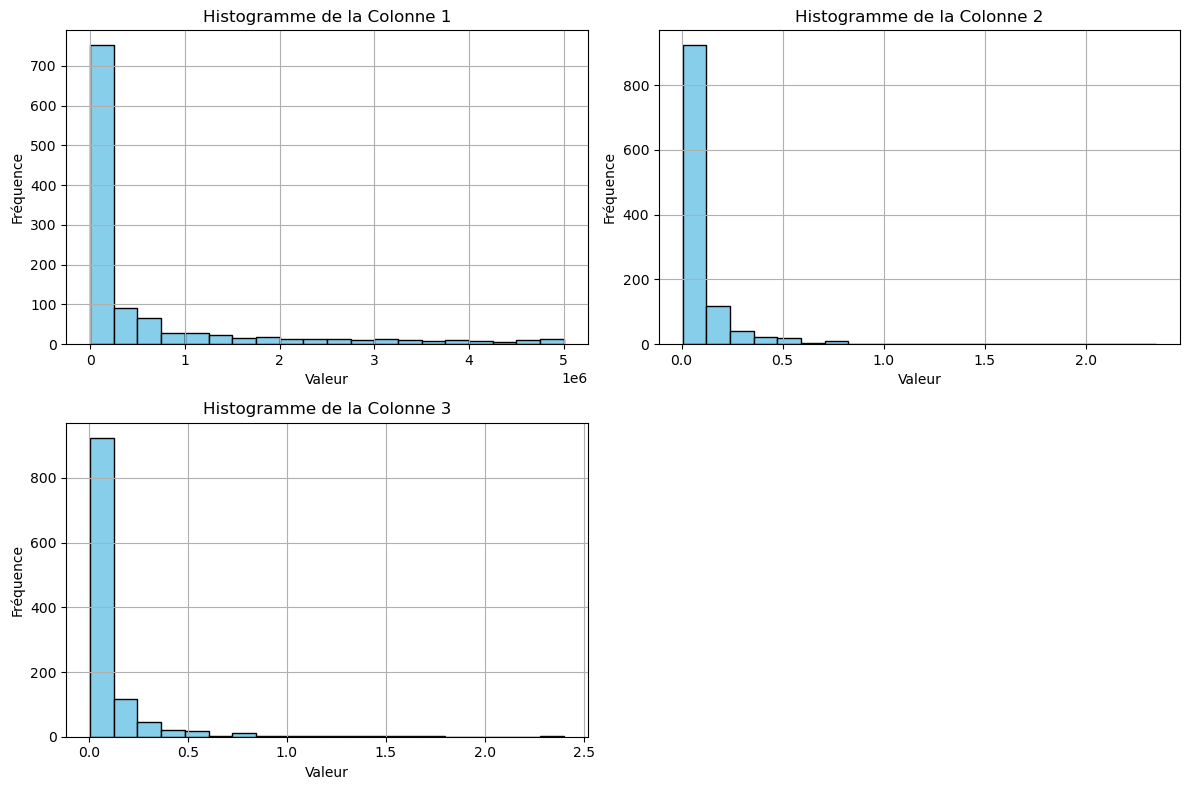

In [2]:
import matplotlib.pyplot as plt

def plot_histograms(data_by_column):
    num_cols = len(data_by_column)
    num_rows = num_cols // 2 + num_cols % 2  # Calculer le nombre de lignes pour les subplots
    plt.figure(figsize=(12, 8))
    
    for i, column_data in enumerate(data_by_column, start=1):
        plt.subplot(num_rows, 2, i)
        plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Histogramme de la Colonne {i}")
        plt.xlabel("Valeur")
        plt.ylabel("Fréquence")
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Utilisation du script
plot_histograms(data_by_column)

## Diagramme en Boîte (Box Plot) des Données Agrégées
Un diagramme en boîte montre la distribution des valeurs dans chaque colonne de données sous forme de boîtes et de moustaches. Cela permet de visualiser la médiane, les quartiles et les outliers.

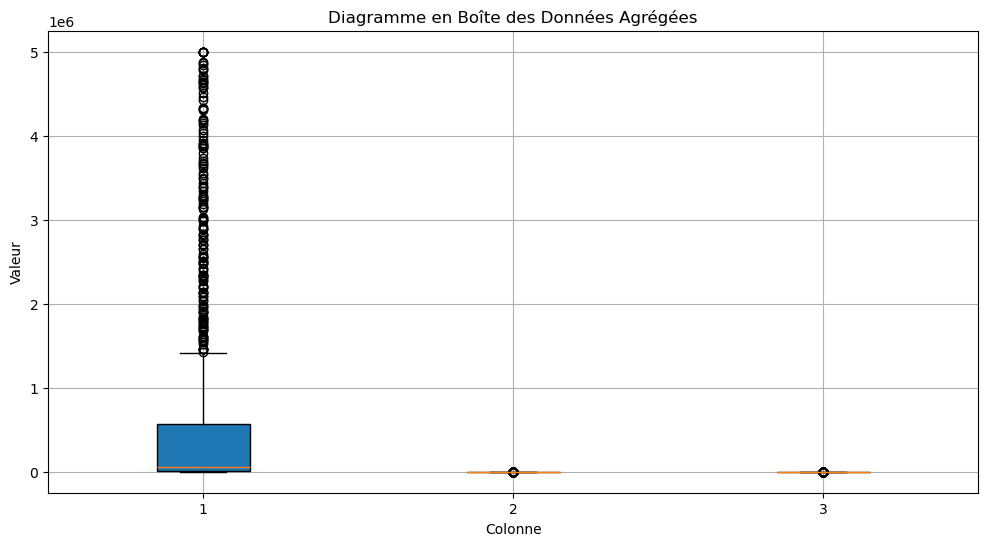

In [3]:
def plot_boxplots(data_by_column):
    plt.figure(figsize=(12, 6))
    plt.boxplot(data_by_column, patch_artist=True)
    plt.title("Diagramme en Boîte des Données Agrégées")
    plt.xlabel("Colonne")
    plt.ylabel("Valeur")
    plt.grid(True)
    plt.show()

# Utilisation du script
plot_boxplots(data_by_column)